In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import func
from sqlalchemy import create_engine
from sqlalchemy import inspect

In [4]:
database_path = "../Resources/hawaii.sqlite"
engine = create_engine("sqlite:///{database_path}")

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# create engine to hawaii.sqlite
conn = engine.connect()

In [7]:
type(engine)

sqlalchemy.engine.base.Engine

In [8]:
station_data = pd.read_sql("SELECT * FROM station", conn)
measurement_data = pd.read_sql("SELECT * FROM measurement", conn)

In [9]:
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [10]:
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [11]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [12]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(bind= engine)

# Exploratory Precipitation Analysis

In [15]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)
print(inspector.get_table_names())

['measurement', 'station']


In [16]:
# Using the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns("measurement")
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [17]:
from sqlalchemy import desc

In [43]:
# Find the most recent date in the data set.
recent = session.query(Measurement.date).order_by(desc('date')).first()
recent

('2017-08-23')

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
recent_dt = dt.datetime.strptime('2017-08-23', "%Y-%m-%d")
recent_dt

In [59]:
antes = dt.date(recent_dt.year-1, recent_dt.month, recent_dt.day)

In [60]:
# Perform a query to retrieve the data and precipitation scores
lastyear = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= (antes)).all()
lastyear

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [61]:
# Save the query results as a Pandas DataFrame and set the index to the date column
lastyear_df = pd.DataFrame(lastyear).set_index("date")
lastyear_df

,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [62]:
# Sort the dataframe by date
lastyear_df = lastyear_df.sort_index(ascending =True)
lastyear_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<AxesSubplot:title={'center':'PRCP vs Date'}, xlabel='Date', ylabel='PRCP (inches)'>

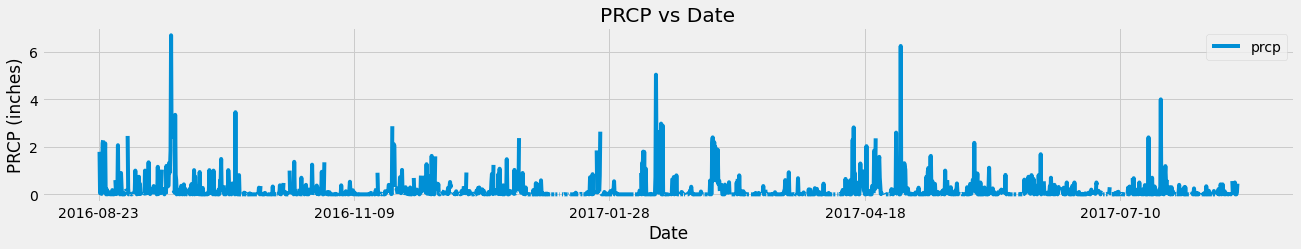

In [70]:
# Use Pandas Plotting with Matplotlib to plot the data
df = lastyear_df.plot(figsize=(20, 3))
df.set_xlabel("Date")
df.set_ylabel("PRCP (inches)")
df.set_title("PRCP vs Date")
df

In [71]:
# Use Pandas to calcualte the summary statistics for the precipitation data
#df.describe()
lastyear_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [72]:
# Using the inspector to print the column names within the 'Station' table and its types
columns = inspector.get_columns("station")
for col in columns:
    print(col["name"], col["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [73]:
# Design a query to calculate the total number stations in the dataset
stats_tot = session.query(Station.station).group_by(Station.station).count()

stats_tot

9

In [74]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stats = session.query(Measurement.station, func.count(Measurement.id)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.id).desc()).all()

active_stats

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [75]:
type(active_stats)

list

In [81]:
active_stats[0]

sqlalchemy.util._collections.result

In [79]:
active_stats[0][0]

'USC00519281'

In [82]:
most_active = active_stats[0][0]
most_active

'USC00519281'

In [84]:
measurement_data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [85]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active).all()[0][0]
highest_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active).all()[0][0]
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active).all()[0][0]


In [86]:
print(most_active)
print(lowest_temp)
print(highest_temp)
print(avg_temp)

USC00519281
54.0
85.0
71.66378066378067


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [87]:
most_active_data = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station == most_active).\
    filter(Measurement.date >= (antes)).all()

In [88]:
most_active_df = pd.DataFrame(most_active_data)
most_active_df.head()

,date,tobs
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


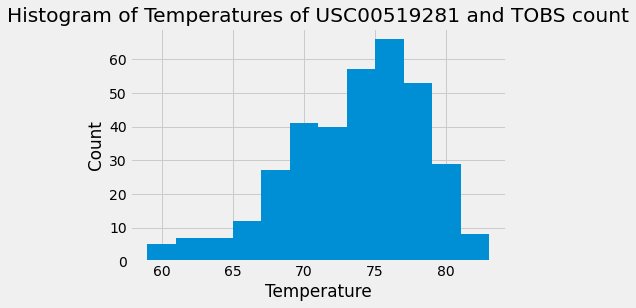

In [90]:
plt.hist(most_active_df["tobs"], bins=12)
plt.xlabel("Temperature")
plt.ylabel("Count")
plt.title(f"Histogram of Temperatures of USC00519281 and TOBS count")
plt.show()

# Close session

In [91]:
# Close Session
session.close()